In [1]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle
import catboost as cbt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
from catboost.utils import get_gpu_device_count
import seaborn as sns
import shap

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 20)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
shap.initjs()

c:\users\eugene\appdata\local\programs\python\python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
cbt_clf = cbt.CatBoostClassifier()
cbt_clf = cbt_clf.load_model('cbt_clf_v2', format='cbm')

In [3]:
train_df = pd.read_csv('train_preprocessed.csv', keep_default_na=False)
train_df

,TENURE,CITY,is_churn,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,P

In [4]:
X = train_df.drop('is_churn', axis=1)
y = train_df.is_churn

In [5]:
explainer = shap.TreeExplainer(cbt_clf)
shap_values = explainer.shap_values(X)

## Клиенты с is_churn=0

In [25]:
pd.DataFrame(X.iloc[0]).T

,TENURE,CITY,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NA

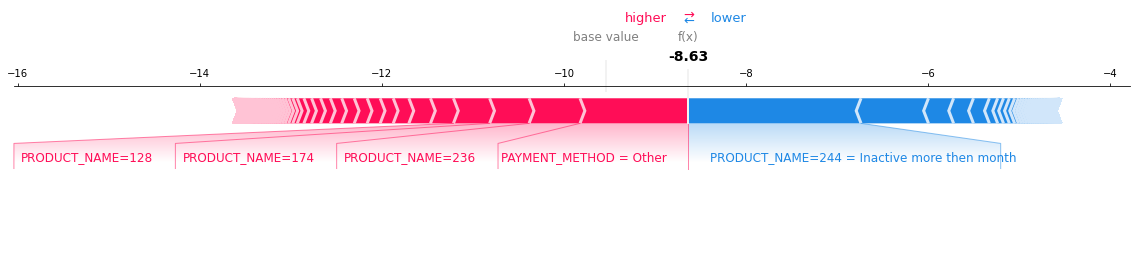

In [27]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], matplotlib=True)

In [30]:
pd.DataFrame(X.iloc[100]).T

,TENURE,CITY,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NA

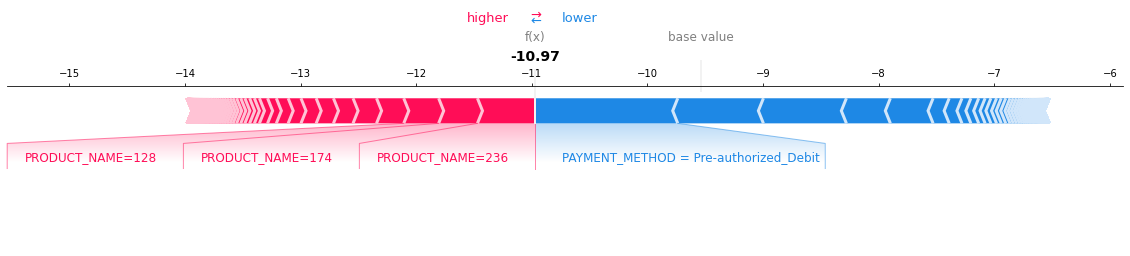

In [31]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[100,:], X.iloc[100,:], matplotlib=True)

In [36]:
pd.DataFrame(X.iloc[1337]).T

,TENURE,CITY,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NA

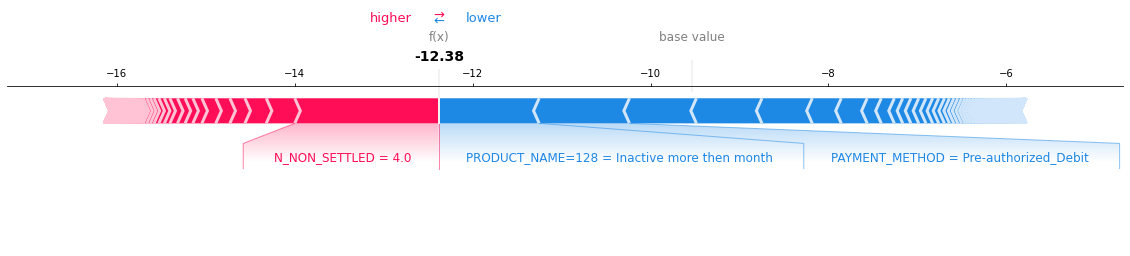

In [37]:
shap.force_plot(explainer.expected_value, shap_values[1337,:], X.iloc[1337,:], matplotlib=True)

## Клиенты с is_churn=1

In [24]:
pd.DataFrame(X.iloc[658]).T

,TENURE,CITY,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NA

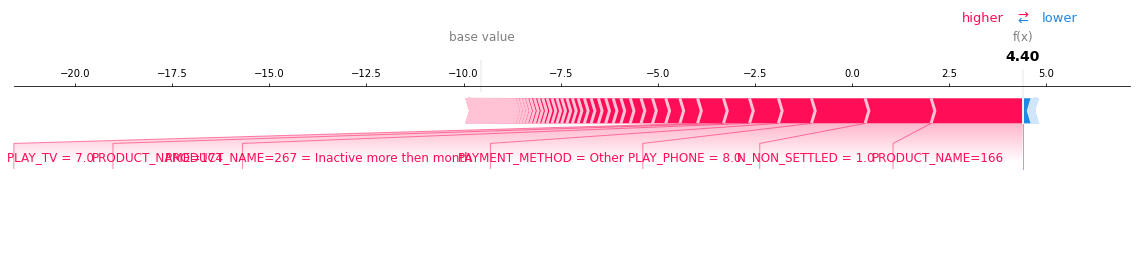

In [28]:
shap.force_plot(explainer.expected_value, shap_values[658,:], X.iloc[658,:], matplotlib=True)

In [32]:
pd.DataFrame(X.iloc[698]).T

,TENURE,CITY,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NA

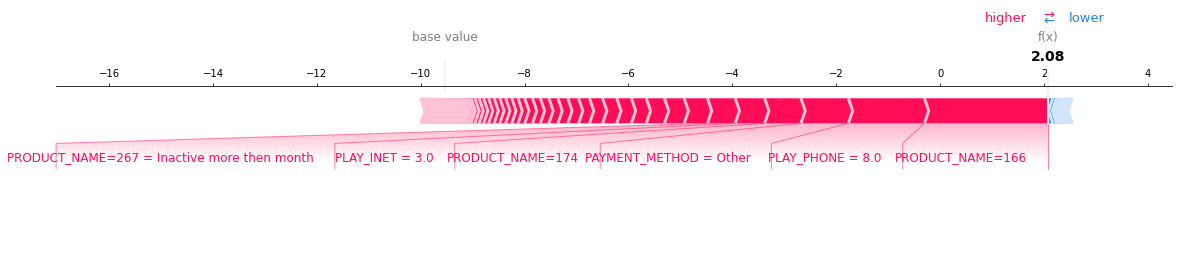

In [33]:
shap.force_plot(explainer.expected_value, shap_values[698,:], X.iloc[698,:], matplotlib=True)

In [34]:
pd.DataFrame(X.iloc[714]).T

,TENURE,CITY,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NA

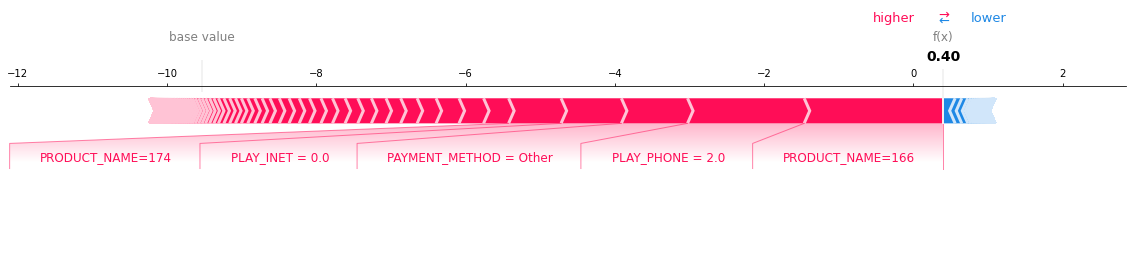

In [35]:
shap.force_plot(explainer.expected_value, shap_values[714,:], X.iloc[714,:], matplotlib=True)